In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1):
    i = 0
    # Random sampling
    all_files = os.listdir(in_folder)
    num_files = int(np.floor(len(all_files) * percent))
    chosen_files = random.sample(all_files, num_files)
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if i == 0:
            df = pd.read_csv(file_name)
            i += 1
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
    return df

In [21]:
df_0 = read_file('../data/data/', percent=0.04)

../data/data/uk_obs_coordinates_000000000063
../data/data/uk_obs_coordinates_000000000045
../data/data/uk_obs_coordinates_000000000055


In [34]:
df_0.shape

(9685337, 6)

In [37]:
df_0['Level'].unique()

array(['Ground Floor', '2nd Floor', '3rd Floor'], dtype=object)

In [36]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

,Site,Level,ClientMacAddr,lat,lng,localtime
6066898,UK Office,2nd Floor,88:66:a5:12:7a:73,51.460898,-0.932414,2019-08-15 10:23:17.67 UTC
6066899,UK Office,2nd Floor,5c:5f:67:8b:1a:dc,51.460890,-0.932408,2019-08-15 10:23:17.67 UTC
6066900,UK Office,2nd Floor,5c:e0:c5:e7:b8:32,51.460896,-0.932419,2019-08-15 10:23:17.67 UTC
6066901,UK Office,2nd Floor,5c:5f:67:8c:00:87,51.460890,-0.932403,2019-08-15 10:23:17.67 UTC
6066902,UK Office,2nd Floor,5c:f7:e6:e6:bb:2a,51.460888,-0.932420,2019-08-15 10:23:17.67 UTC
...,...,...,...,...,...,...
9685332,UK Office,3rd Floor,48:2c:a0:8e:7a:b1,51.460481,-0.932594,2020-02-12 07:10:43.822 UTC
9685333,UK Office,3rd Floor,6c:c7:ec:d2:6d:ba,51.460457,-0.932518,2020-02-12 07:10:34.563 UTC
9685334,UK Office,3rd Floor,48:2c:a0:8e:7a:b1,51.460481,-0.932594,2020-02-12 07:10:34.561 UTC
9685335,UK Office,3rd Floor,6c:c7:ec:d2:6d:ba,51.460470,-0.932488,2020-02-12 07:10:29.8 UTC


### Data cleaning

In [38]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor', '3rd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 9685337


,index,Site,Level,ClientMacAddr,lat,lng,localtime
5762586,9685332,UK Office,3rd Floor,48:2c:a0:8e:7a:b1,51.460481,-0.932594,2020-02-12 07:10:43.822 UTC
5762587,9685333,UK Office,3rd Floor,6c:c7:ec:d2:6d:ba,51.460457,-0.932518,2020-02-12 07:10:34.563 UTC
5762588,9685334,UK Office,3rd Floor,48:2c:a0:8e:7a:b1,51.460481,-0.932594,2020-02-12 07:10:34.561 UTC
5762589,9685335,UK Office,3rd Floor,6c:c7:ec:d2:6d:ba,51.460470,-0.932488,2020-02-12 07:10:29.8 UTC
5762590,9685336,UK Office,3rd Floor,48:2c:a0:8e:7a:b1,51.460483,-0.932591,2020-02-12 07:10:28.575 UTC


In [39]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


,index,Site,Level,ClientMacAddr,lat,lng,localtime
1765769,7495025,UK Office,2nd Floor,e4:a7:a0:99:dd:ec,51.460636,-0.932346,2019-08-12 18:27:06.711 UTC
1765770,7495027,UK Office,2nd Floor,0c:51:01:b3:88:92,51.460818,-0.932250,2019-08-12 18:27:06.21 UTC
1765771,7495030,UK Office,2nd Floor,9c:8c:6e:46:0c:52,51.460747,-0.932330,2019-08-12 18:27:05.207 UTC
1765772,7495031,UK Office,2nd Floor,08:f6:9c:14:24:1b,51.460832,-0.932248,2019-08-12 18:27:05.207 UTC
1765773,7495032,UK Office,2nd Floor,98:10:e8:08:5b:82,51.460822,-0.932270,2019-08-12 18:27:05.207 UTC


In [40]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 7528365


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,Ground Floor,b0:19:c6:df:a0:86,51.460389,-0.932563,2020-06-24 20:49:42.118 UTC
1,UK Office,Ground Floor,0c:51:01:9e:8b:c8,51.460507,-0.932390,2020-06-24 20:49:40.907 UTC
2,UK Office,Ground Floor,0c:51:01:b3:8d:18,51.460503,-0.932406,2020-06-24 20:49:40.907 UTC
3,UK Office,Ground Floor,60:70:c0:f3:ce:b9,51.460413,-0.932669,2020-06-24 20:49:39.493 UTC
4,UK Office,Ground Floor,00:c2:c6:f9:2f:9f,51.460389,-0.932662,2020-06-24 20:49:39.17 UTC
5,UK Office,Ground Floor,ec:ad:b8:68:fc:88,51.460535,-0.932329,2020-06-24 20:49:38.861 UTC
6,UK Office,Ground Floor,5c:5f:67:8b:e0:cf,51.460501,-0.932371,2020-06-24 20:49:38.861 UTC
7,UK Office,Ground Floor,a0:4e:a7:b9:bf:7d,51.460492,-0.932444,2020-06-24 20:49:36.868 UTC
8,UK Office,Ground Floor,0c:51:01:b3:8d:18,51.460503,-0.932407,2020-06-24 20:49:35.873 UTC
9,UK Office,Ground Floor,0c:51:01:9e:8b:c8,51.460507,-0.932390,2020-06-24 20:49:35.873 UTC


In [41]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='4th Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [42]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 7528365


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528365 entries, 0 to 7528364
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 344.6+ MB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [44]:
df['localtime'] = df['localtime'].astype('datetime64[ns]')
df['date']  = df['localtime'].dt.date
df['day']   = df['localtime'].dt.day
df['month'] = df['localtime'].dt.month
df['year']  = df['localtime'].dt.year
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
df.head()

,Site,Level,ClientMacAddr,lat,lng,localtime,date,day,month,year,time,dayOfWeek,IsWeekend
0,UK Office,Ground Floor,b0:19:c6:df:a0:86,51.460389,-0.932563,2020-06-24 20:49:42.118,2020-06-24,24,6,2020,20:49:42,2,False
1,UK Office,Ground Floor,0c:51:01:9e:8b:c8,51.460507,-0.932390,2020-06-24 20:49:40.907,2020-06-24,24,6,2020,20:49:40,2,False
2,UK Office,Ground Floor,0c:51:01:b3:8d:18,51.460503,-0.932406,2020-06-24 20:49:40.907,2020-06-24,24,6,2020,20:49:40,2,False
3,UK Office,Ground Floor,60:70:c0:f3:ce:b9,51.460413,-0.932669,2020-06-24 20:49:39.493,2020-06-24,24,6,2020,20:49:39,2,False
4,UK Office,Ground Floor,00:c2:c6:f9:2f:9f,51.460389,-0.932662,2020-06-24 20:49:39.170,2020-06-24,24,6,2020,20:49:39,2,False


In [45]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-08-12
2020-09-01


## Frequency in days

In [46]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

,ClientMacAddr,total_day,total_signal
0,00:06:c6:92:a5:c1,1,13
1,00:08:22:20:bc:fb,1,57
2,00:08:22:26:bb:fb,1,72
3,00:08:22:44:bb:fb,1,20
4,00:08:22:7c:ba:fb,1,29
...,...,...,...
6856,fc:62:b9:23:ea:05,2,50
6857,fc:62:b9:5e:ce:70,1,13
6858,fc:65:de:04:ba:a1,2,864
6859,fc:94:35:23:ee:a5,2,39


In [13]:
# Frequency in days
frequency['total_day'].value_counts()

1    3452
2     959
3     516
4     130
5      94
6      73
8       7
7       1
Name: total_day, dtype: int64

## Weekend & Weekday

In [14]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

,ClientMacAddr,IsWeekend,Days
0,00:07:88:d8:94:64,False,1
1,00:08:22:64:c3:fb,False,1
2,00:08:22:6a:c2:fb,False,1
3,00:08:22:96:c3:fb,False,1
4,00:0e:8e:5a:da:d1,True,1
...,...,...,...
5239,fc:62:b9:37:d3:5f,False,1
5240,fc:62:b9:5f:5d:94,False,1
5241,fc:62:b9:70:33:fa,False,1
5242,fc:62:b9:70:e2:a5,False,1


In [15]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

,ClientMacAddr,Days
4623,98:10:e8:08:59:92,6
333,48:bf:6b:51:3c:bf,6
4280,6c:96:cf:c9:11:df,6
4386,88:66:a5:0e:70:6e,6
4479,88:66:a5:56:6a:fa,6
...,...,...
2145,68:c4:4d:71:25:ea,1
2146,68:c4:4d:71:5c:1f,1
2147,68:c4:4d:71:5c:21,1
2148,68:c4:4d:71:5c:d7,1


In [16]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

,ClientMacAddr,Days
211,34:e1:2d:c6:a8:59,2
4544,8c:fe:57:80:c3:d3,2
4619,98:10:e8:07:e1:12,2
4681,9c:8c:6e:46:01:f8,2
4683,9c:8c:6e:46:0c:52,2
4919,bc:b8:63:9f:29:b4,2
4958,c4:6e:1f:1b:72:40,2
5169,e8:de:27:9f:7f:0c,2
4,00:0e:8e:5a:da:d1,1
66,08:f6:9c:14:24:1b,1


In [17]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

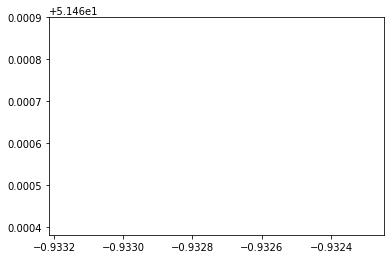

In [18]:
# Plot ClientMacAddr: 9c:8c:6e:46:0b:7c
# 50 weekend days
person1 = df[df['ClientMacAddr']=='9c:8c:6e:46:0b:7c']
plt.scatter(person1['lng'], person1['lat'])
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

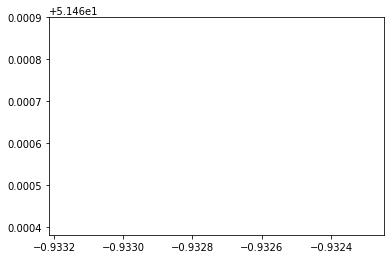

In [19]:
# Plot ClientMacAddr: 9c:8c:6e:46:1c:5e
# 50 weekend days
person2 = df[df['ClientMacAddr']=='9c:8c:6e:46:1c:5e']
plt.scatter(person2['lng'], person2['lat'])
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

In [20]:
# Distance
for i in weekend_guy:
    person = df[df['ClientMacAddr'] == i ]
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

NameError: name 'weekend_guy' is not defined

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 80 / 180 Days
3. Contain data in weekends
4. Contain data in night shift
5. High density: low Variance

Mobile device:
1. Distance >= 45 meters
2. Low density
     - Security guard: 
     1. Night shift
     2. Frequency in days > 5
     3. Contain data in weekend
     - Employee:
     1. Frequency in days > 5
     2. No weekends
     - Visitors:
     1. Frequency in days <= 5
     2. No weekends

In [ ]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

In [ ]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})
df_temp

In [ ]:
df_temp.info()

In [ ]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[(df_temp['Distance(Meter)']<45)&(df_temp['total_day']>80)&(df_temp['Weekend']!=0), 'Job function'] = 'Fixed Device'
df_temp

In [ ]:
# Distribution of distance
import seaborn as sns
sns.distplot(df_temp['Distance(Meter)'])

In [ ]:
sns.distplot(df_temp['total_day'])

In [ ]:
sns.distplot(df_temp['total_signal'])

In [ ]:
df_temp.describe()